# Importing Libraries

In [251]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
#! pip install plotly
#! pip install cufflinks
#! pip install textblob

# Loading files 

In [252]:
path_train_data = "C:\\Users\\vishd\\Desktop\\reetu\\Springboard course\\Project 2\\train1.csv"
path_test_data = "C:\\Users\\vishd\\Desktop\\reetu\\Springboard course\\Project 2\\test.csv"

In [253]:
train_data = pd.read_csv(path_train_data)
print(train_data.head())
test_data = pd.read_csv(path_test_data)

          id                                            context  \
0  903deec17  ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...   
1  d9841668c  காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...   
2  29d154b56  சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Flem...   
3  41660850a  குழந்தையின் அழுகையை  நிறுத்தவும், தூங்க வைக்கவ...   
4  b29c82c22  சூரியக் குடும்பம் \nசூரியக் குடும்பம் (Solar S...   

                                            question  \
0               மனித உடலில் எத்தனை எலும்புகள் உள்ளன?   
1                         காளிதாசன் எங்கு பிறந்தார்?   
2                   பென்சிலின் கண்டுபிடித்தவர் யார்?   
3  தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...   
4                பூமியின் அருகில் உள்ள விண்மீன் எது?   

                  answer_text  answer_start language  
0                         206            53    tamil  
1                  காசுமீரில்          2358    tamil  
2  சர் அலெக்ஸாண்டர் ஃபிளெமிங்             0    tamil  
3                    தாலாட்டு           

In [254]:
print(train_data[train_data['language'] == 'hindi'].iloc[0]['context'][935: 1000])

एडोल्फ मेयर ने बताया कि तम्बाकू में मोजेक रोग एक विशेष प्रकार के 


#Checking the shape of the files 

In [255]:
print(train_data.shape)
print(test_data.shape)

(1114, 6)
(5, 4)


In [256]:
train_data.describe()

,answer_start
count,1114.000000
mean,1709.403052
std,3730.169300
min,0.000000
25%,67.000000
50%,373.000000
75%,1387.750000
max,40991.000000


In [257]:
#train_data.describe(include='all')

In [258]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1114 non-null   object
 1   context       1114 non-null   object
 2   question      1114 non-null   object
 3   answer_text   1114 non-null   object
 4   answer_start  1114 non-null   int64 
 5   language      1114 non-null   object
dtypes: int64(1), object(5)
memory usage: 52.3+ KB


In [259]:
print(train_data.nunique())

id              1114
context          924
question        1104
answer_text      990
answer_start     723
language           2
dtype: int64


In [260]:
print(train_data[train_data['language'] == 'hindi'].count())
#print(train_data[train_data['language'] == 'hindi']['question'].count())

id              746
context         746
question        746
answer_text     746
answer_start    746
language        746
dtype: int64


In [261]:
print(train_data[train_data['language'] == 'tamil'].count())

id              368
context         368
question        368
answer_text     368
answer_start    368
language        368
dtype: int64


<AxesSubplot:title={'center':'Freq of language'}>

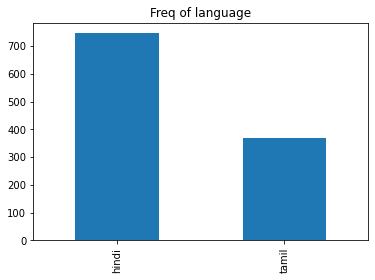

In [262]:
train_data['language'].value_counts().plot.bar(title='Freq of language')

In [263]:
train_data.isnull().values.any()
train_data.isnull().sum()

id              0
context         0
question        0
answer_text     0
answer_start    0
language        0
dtype: int64

In [264]:
#print( " ".join(train_data['context'].tolist())[:1000])

# Feature Engineearing

In [265]:
#from textblob import TextBlob

In [266]:
train_data['context_len'] = train_data['context'].apply(lambda x: len(x))
print(train_data['context_len'])
print('max text len of context-', train_data['context_len'].max())
print('min text len of context-', train_data['context_len'].min())
print('mean text len of context-', train_data['context_len'].mean())

0        4340
1        7647
2        4970
3        8493
4        9954
        ...  
1109     9832
1110     1094
1111     4753
1112    31565
1113     4683
Name: context_len, Length: 1114, dtype: int64
max text len of context- 49815
min text len of context- 176
mean text len of context- 10999.168761220826


In [267]:
train_data['question_len'] = train_data['question'].apply(lambda x: len(x))
print(train_data['question_len'])
print('max text len of question-', train_data['question_len'].max())
print('min text len of question-', train_data['question_len'].min())
print('mean text len of question-', train_data['question_len'].mean())

0       36
1       26
2       32
3       75
4       35
        ..
1109    46
1110    27
1111    45
1112    47
1113    37
Name: question_len, Length: 1114, dtype: int64
max text len of question- 121
min text len of question- 19
mean text len of question- 41.6508078994614


In [268]:
train_data['context_word_count'] = train_data['context'].apply(lambda x: len(x.split()))
print(train_data['context_word_count'])

print('max_context_word_count of context-', train_data['context_word_count'].max())
print('min_context_word_count of context-',train_data['context_word_count'].min())
print('mean_context_word_count of context-',train_data['context_word_count'].mean())

0        512
1        789
2        508
3        941
4       1113
        ... 
1109    1797
1110     187
1111     909
1112    6113
1113     822
Name: context_word_count, Length: 1114, dtype: int64
max_context_word_count of context- 10259
min_context_word_count of context- 24
mean_context_word_count of context- 1694.25763016158


In [269]:
train_data['question_word_count'] = train_data['question'].apply(lambda x: len(x.split()))
print(train_data['question_word_count'])


print('max_question_word_count_train_data',train_data['question_word_count'].max())
print('min_question_word_count_train_data',train_data['question_word_count'].min())
print('mean_question_word_count_train_data',train_data['question_word_count'].mean())

0        5
1        3
2        3
3        8
4        5
        ..
1109     8
1110     4
1111     8
1112    10
1113     9
Name: question_word_count, Length: 1114, dtype: int64
max_question_word_count_train_data 22
min_question_word_count_train_data 3
mean_question_word_count_train_data 7.123877917414721


In [270]:
# Average word len

def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len +len(word)
    return word_len/len(words)



In [271]:
train_data['avg_word_len_cont'] = train_data['context'].apply(lambda x: get_avg_word_len(x))
print(train_data['avg_word_len_cont'])
train_data['avg_word_len_quest'] = train_data['question'].apply(lambda x: get_avg_word_len(x))
print(train_data['avg_word_len_quest'])

0       7.294922
1       8.621039
2       8.740157
3       7.637620
4       7.910153
          ...   
1109    4.436839
1110    4.834225
1111    4.212321
1112    4.145264
1113    4.654501
Name: avg_word_len_cont, Length: 1114, dtype: float64
0        6.400000
1        8.000000
2       10.000000
3        8.500000
4        6.200000
          ...    
1109     4.875000
1110     6.000000
1111     4.750000
1112     3.800000
1113     3.222222
Name: avg_word_len_quest, Length: 1114, dtype: float64


In [272]:
train_data.head()

,id,context,question,answer_text,answer_start,language,context_len,question_len,context_word_count,question_word_count,avg_word_len_cont,avg_word_len_quest
0,903deec17,ஒரு சாதாரண வளர்ந்த மனிதனுடைய எலும்புக்கூடு பின...,மனித உடலில் எத்தனை எலும்புகள் உள்ளன?,206,53,tamil,4340,36,512,5,7.294922,6.4
1,d9841668c,காளிதாசன் (தேவநாகரி: कालिदास) சமஸ்கிருத இலக்கி...,காளிதாசன் எங்கு பிறந்தார்?,காசுமீரில்,2358,tamil,7647,26,789,3,8.621039,8.0
2,29d154b56,சர் அலெக்ஸாண்டர் ஃபிளெமிங் (Sir Alexander Flem...,பென்சிலின் கண்டுபிடித்தவர் யார்?,சர் அலெக்ஸாண்டர் ஃபிளெமிங்,0,tamil,4970,32,508,3,8.740157,10.0
3,41660850a,"குழந்தையின் அழுகையை நிறுத்தவும், தூங்க வைக்கவ...",தமிழ்நாட்டில் குழந்தைகளை தூங்க வைக்க பாடும் பா...,தாலாட்டு,68,tamil,8493,75,941,8,7.637620,8.5
4,b29c82c22,சூரியக் குடும்பம் \nசூரியக் குடும்பம் (Solar S...,பூமியின் அருகில் உள்ள விண்மீன் எது?,சூரியனும்,585,tamil,9954,35,1113,5,7.910153,6.2


# Visualization 

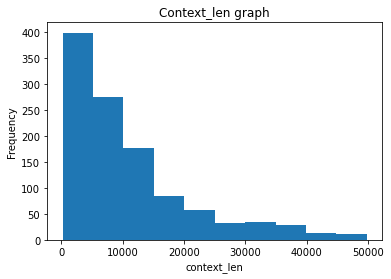

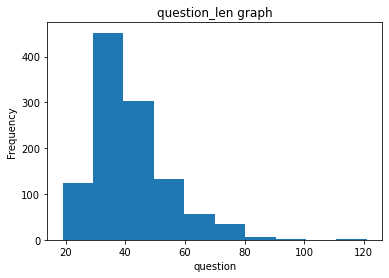

In [273]:
#fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, sharey=True)
#train_data['context_len'].plot(kind = 'hist')#, xTitle = 'context_len') 
# plotting the points 
plt.hist(train_data['context_len'])
plt.xlabel('context_len')
plt.ylabel('Frequency')
plt.title('Context_len graph')
plt.show()

plt.hist(train_data['question_len'])
plt.xlabel('question')
plt.ylabel('Frequency')
plt.title('question_len graph')
plt.show()

#ax[1,2].plt(X, Y2)

#fig.suptitle('Context and Question len', fontsize=16)

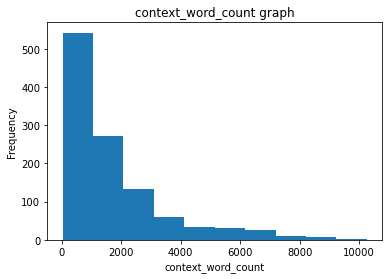

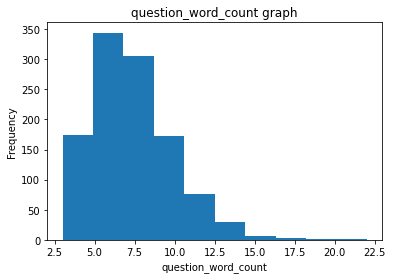

In [274]:
plt.hist(train_data['context_word_count'])
plt.xlabel('context_word_count')
plt.ylabel('Frequency')
plt.title('context_word_count graph')
plt.show()

plt.hist(train_data['question_word_count'])
plt.xlabel('question_word_count')
plt.ylabel('Frequency')
plt.title('question_word_count graph')
plt.show()


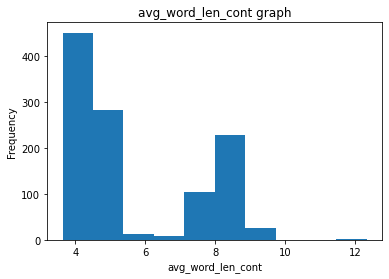

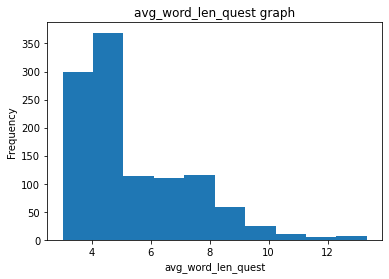

In [275]:
plt.hist(train_data['avg_word_len_cont'])
plt.xlabel('avg_word_len_cont')
plt.ylabel('Frequency')
plt.title('avg_word_len_cont graph')
plt.show()

plt.hist(train_data['avg_word_len_quest'])
plt.xlabel('avg_word_len_quest')
plt.ylabel('Frequency')
plt.title('avg_word_len_quest graph')
plt.show()

In [276]:
#train_data.groupby('context').count()

In [277]:
train_data.groupby('language').count()

,id,context,question,answer_text,answer_start,context_len,question_len,context_word_count,question_word_count,avg_word_len_cont,avg_word_len_quest
language,,,,,,,,,,,
hindi,746,746,746,746,746,746,746,746,746,746,746
tamil,368,368,368,368,368,368,368,368,368,368,368


# Unigram 

In [278]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(x,n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [279]:
context_unigram = get_top_n_words(train_data['context'], 20)
print(context_unigram)

[('கள', 49152), ('और', 26831), ('பட', 22639), ('पर', 19972), ('एक', 15099), ('रत', 12488), ('कर', 11657), ('इस', 9535), ('यह', 9150), ('गय', 8646), ('वर', 8624), ('என', 8267), ('अन', 8206), ('सम', 7759), ('கப', 7514), ('இர', 7117), ('தல', 6834), ('றத', 6414), ('अपन', 6310), ('மற', 6200)]


In [280]:
question_unigram = get_top_n_words(train_data['question'], 20)
print(context_unigram)

[('கள', 49152), ('और', 26831), ('பட', 22639), ('पर', 19972), ('एक', 15099), ('रत', 12488), ('कर', 11657), ('इस', 9535), ('यह', 9150), ('गय', 8646), ('वर', 8624), ('என', 8267), ('अन', 8206), ('सम', 7759), ('கப', 7514), ('இர', 7117), ('தல', 6834), ('றத', 6414), ('अपन', 6310), ('மற', 6200)]


In [281]:
#Plotting Unigram

In [282]:
df_context_uni = pd.DataFrame(context_unigram, columns = ['Unigram', 'Frequency'])
print(df_context_uni.head())

df_question_uni = pd.DataFrame(question_unigram, columns = ['Unigram', 'Frequency'])
print(df_question_uni.head())

  Unigram  Frequency
0      கள      49152
1      और      26831
2      பட      22639
3      पर      19972
4      एक      15099
  Unigram  Frequency
0      तन        114
1      எத        112
2      रत         88
3      कब         86
4      பட         84


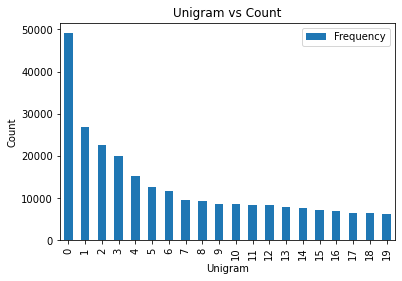

In [283]:
df_context_uni.plot(kind = 'bar')
plt.xlabel('Unigram')
plt.ylabel('Count')
plt.title('Unigram vs Count')
plt.show()

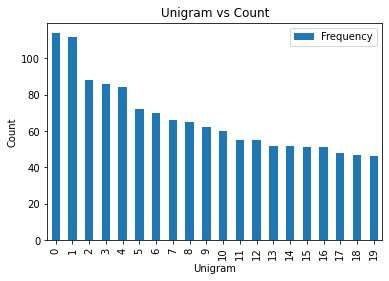

In [284]:
df_question_uni.plot(kind = 'bar')
plt.xlabel('Unigram')
plt.ylabel('Count')
plt.title('Unigram vs Count')
plt.show()

# Bigram

In [285]:

def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range= (2,2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [286]:
context_bigram = get_top_n_words(train_data['context'], 20)
print(context_bigram)
question_bigram = get_top_n_words(train_data['question'], 20)
print(question_bigram)

[('கப பட', 5345), ('பட டத', 2569), ('பட றத', 2250), ('தப பட', 1935), ('மக கள', 1889), ('கள கள', 1485), ('ஆம ஆண', 1471), ('उत तर', 1467), ('டப பட', 1408), ('பக கள', 1400), ('அல லத', 1384), ('என பத', 1366), ('யப பட', 1265), ('டங கள', 1253), ('பயன பட', 1222), ('கள பக', 1175), ('கள உள', 1142), ('உள ளத', 1124), ('ஏற பட', 1097), ('பட றன', 1069)]
[('பட டத', 51), ('எத தன', 40), ('கப பட', 35), ('உள ளன', 32), ('जन कब', 31), ('கள உள', 29), ('தல நகரம', 26), ('நகரம எத', 25), ('लय कह', 20), ('रफल तन', 20), ('கண தவர', 19), ('பரப பளவ', 19), ('பளவ என', 19), ('सबस पहल', 19), ('வப பட', 18), ('உள ளத', 18), ('எப றந', 17), ('எப வப', 16), ('எந ஆண', 16), ('யர என', 16)]


In [287]:
df_context_bi = pd.DataFrame(context_bigram, columns = ['Bigram', 'Frequency'])
print(df_context_bi.head())

df_question_bi = pd.DataFrame(question_bigram, columns = ['Bigram', 'Frequency'])
print(df_question_bi.head())

  Bigram  Frequency
0  கப பட       5345
1  பட டத       2569
2  பட றத       2250
3  தப பட       1935
4  மக கள       1889
  Bigram  Frequency
0  பட டத         51
1  எத தன         40
2  கப பட         35
3  உள ளன         32
4  जन कब         31


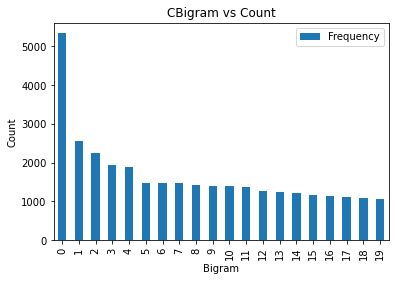

In [288]:
#df_context_uni = df_context_uni.set_index('Unigram')
df_context_bi.plot(kind = 'bar')
#plt.hist(train_data['avg_word_len_quest'])
plt.xlabel('Bigram')
plt.ylabel('Count')
plt.title('CBigram vs Count')
plt.show()

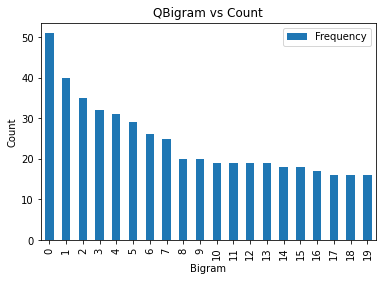

In [289]:
#df_context_uni = df_context_uni.set_index('Unigram')
df_question_bi.plot(kind = 'bar')
#plt.hist(train_data['avg_word_len_quest'])
plt.xlabel('Bigram')
plt.ylabel('Count')
plt.title('QBigram vs Count')
plt.show()

# Trigram

In [290]:

def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range= (3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [291]:
context_trigram = get_top_n_words(train_data['context'], 20)
print(context_trigram)
question_trigram = get_top_n_words(train_data['question'], 20)
print(question_trigram)

[('கப பட டத', 1002), ('பட தப பட', 851), ('அழ கப பட', 616), ('கப பட றத', 578), ('கள உள ளன', 568), ('கர தப பட', 475), ('பயன பட தப', 443), ('தப பட றத', 427), ('என அழ கப', 427), ('அற யப பட', 330), ('தப பட டத', 323), ('கள பயன பட', 318), ('உற னர கள', 305), ('கப பட ளத', 298), ('கள கப பட', 289), ('கப பட றன', 288), ('கட டப பட', 281), ('உர கப பட', 270), ('கள ஏற பட', 267), ('டப பட டத', 262)]
[('கள உள ளன', 28), ('கப பட டத', 26), ('தல நகரம எத', 24), ('பரப பளவ என', 19), ('வப பட டத', 18), ('எப வப பட', 16), ('கண கப பட', 15), ('எப கண கப', 12), ('लय कह पर', 10), ('அழ கப பட', 8), ('எங உள ளத', 7), ('நகரத பரப பளவ', 7), ('அரச யல கட', 7), ('எத தன லங', 6), ('தன லங கள', 6), ('லங கள உள', 6), ('எத தன கள', 5), ('சப பட எத', 5), ('யல யர என', 5), ('இந எத தன', 5)]


In [292]:
df_context_tri = pd.DataFrame(context_trigram, columns = ['Bigram', 'Frequency'])
print(df_context_tri.head())

df_question_tri = pd.DataFrame(question_trigram, columns = ['Bigram', 'Frequency'])
print(df_question_tri.head())

     Bigram  Frequency
0  கப பட டத       1002
1  பட தப பட        851
2  அழ கப பட        616
3  கப பட றத        578
4  கள உள ளன        568
       Bigram  Frequency
0    கள உள ளன         28
1    கப பட டத         26
2  தல நகரம எத         24
3  பரப பளவ என         19
4    வப பட டத         18


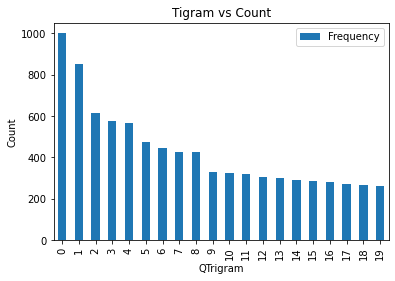

In [293]:
df_context_tri.plot(kind = 'bar')
plt.xlabel('QTrigram')
plt.ylabel('Count')
plt.title('Tigram vs Count')
plt.show()

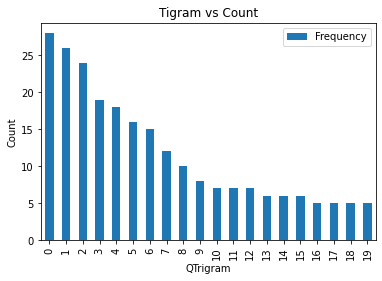

In [294]:
df_question_tri.plot(kind = 'bar')
plt.xlabel('QTrigram')
plt.ylabel('Count')
plt.title('Tigram vs Count')
plt.show()

In [ ]:
cdQA-annotator
npm install

In [ ]:
npm run serve


# Stopwords 
#https://advertools.readthedocs.io/en/master/advertools.stopwords.html
https://www.youtube.com/watch?v=HVBk2Ge_Q98

#https://advertools.readthedocs.io/en/master/advertools.word_frequency.html#absolute-and-weighted-word-count
#https://www.analyticsvidhya.com/blog/2019/02/stanfordnlp-nlp-library-python/


In [295]:
#source activate stanfordnlp
from bs4 import BeautifulSoup
import stanfordnlp
import torch
import fastai, torch
import advertools as adv
#stanfordnlp.download('hi')

In [296]:
Stop_Hindi = sorted(adv.stopwords['hindi'])
print(Stop_Hindi)
#["a", "ab", "aber", "ach", "acht"]

['अंदर', 'अत', 'अदि', 'अप', 'अपना', 'अपनि', 'अपनी', 'अपने', 'अभि', 'अभी', 'आदि', 'आप', 'इंहिं', 'इंहें', 'इंहों', 'इतयादि', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकि', 'इसकी', 'इसके', 'इसमें', 'इसि', 'इसी', 'इसे', 'उंहिं', 'उंहें', 'उंहों', 'उन', 'उनका', 'उनकि', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसि', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'एसे', 'ऐसे', 'ओर', 'और', 'कइ', 'कई', 'कर', 'करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफि', 'काफ़ी', 'कि', 'किंहें', 'किंहों', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसि', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोइ', 'कोई', 'कोन', 'कोनसा', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जहां', 'जा', 'जिंहें', 'जिंहों', 'जितना', 'जिधर', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जेसा', 'जेसे', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिंहें', 'तिंहों', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थि', 'थी', 'थे', 'दबारा', 'दवा

In [297]:
Stop_Tamil = sorted(adv.stopwords['tamil'])[:5]
print(Stop_Tamil)

['அங்கு', 'அங்கே', 'அடுத்த', 'அதனால்', 'அதன்']


In [298]:
import nltk
print(nltk.corpus.indian.words('hindi.pos'))

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]
